In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
A. Create an array containing the values 4, 0, 6, 5, 11, 14, 12, 14, 5, 16.

B. Create a 10x2 array of zeros.

C. Write a for loop that checks if each of the numbers in the first array squared is less than 100. If the statement is true, change that row of your zeros array to equal the number and its square. Hint: you can change the value of an array by stating "zerosarray[i] = [a number, a number squared]".

D. Print out the final version of your zeros array.

Hint: should you loop over the elements of the array or the indices of the array? Does enumerate help you at all?

In [2]:
#part a
arr = np.array([4, 0, 6, 5, 11, 14, 12, 14, 5, 16])

In [3]:
arr

array([ 4,  0,  6,  5, 11, 14, 12, 14,  5, 16])

In [4]:
#part b
twodarr = np.zeros((10, 2))

In [5]:
twodarr

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
#part c
for idx, number in enumerate(arr):
    if number ** 2 < 100:
        
        twodarr[idx] = [number, number**2]
        

In [7]:
#part d
print(twodarr)

[[ 4. 16.]
 [ 0.  0.]
 [ 6. 36.]
 [ 5. 25.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 5. 25.]
 [ 0.  0.]]


## Exercise 2
A. Write a function that takes an array of numbers and spits out the Gaussian distribution. Yes, there is a function for this in Python, but it's good to do this from scratch! This is the equation:


$N(x, \mu, \sigma) = \frac{1}{\sqrt{2 \pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$
 
 
(Pi is built into numpy, so call it as np.pi. Also, double click this cell to see the markup for writing LaTeX math.)

B. Call the function a few different times for different values of mu and sigma, between -10 < x < 10.

C. Plot each version, making sure they are differentiated with different colors and/or linestyles and include a legend. Btw, here's a list of the customizations available in matplotlib:

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/gallery/color/named_colors.html

D. Save your figure.

If you have multiple lines with plt.plot(), Python will plot all of them together, unless you write plt.show() after each one. I want these all on one plot.

In [8]:
#part a
def Gaussian(x, mu, sigma):
    '''
    Function that takes in a mean and standard deviation and will provide the probability of 
    getting value x
    
    Inputs
    ----------
    x: value to get the probability of
    mu: center of the gaussian (mean)
    sigma: standard deviation of the gaussian
    
    Returns
    ----------
    probability associated with x assuming a Gaussian
    '''
    prefactor = (np.sqrt(2 * np.pi) * sigma)**-1
    exponent = (x-mu)**2/(2*sigma**2)
    
    return prefactor * np.exp(-exponent)

In [9]:
#part b
x = np.linspace(-10, 10, 1000)

mu1 = 5
sigma1 = 2

gauss1 = Gaussian(x, mu1, sigma1)

mu2 = 10
sigma2 = 3

gauss2 = Gaussian(x, mu2, sigma2)

mu3 = 0
sigma3 = 5

gauss3 = Gaussian(x, mu3, sigma3)

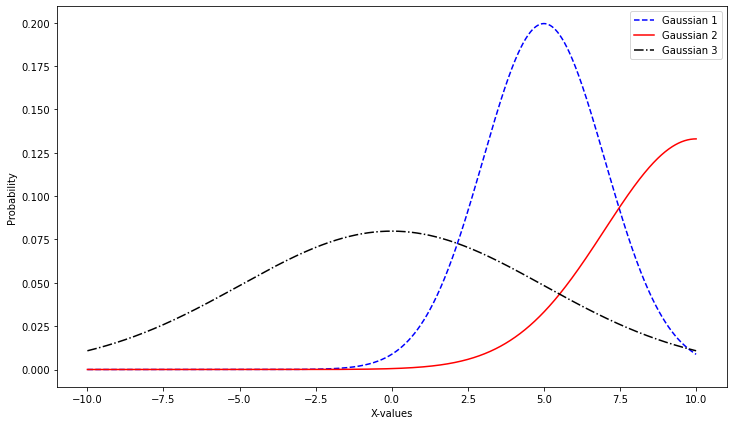

In [10]:
#part c
plt.figure(figsize = (12, 7))
plt.plot(x, gauss1, label = 'Gaussian 1', linestyle = '--', color = 'blue')
plt.plot(x, gauss2, label = 'Gaussian 2', linestyle = '-', color = 'red')
plt.plot(x, gauss3, label = 'Gaussian 3', linestyle = '-.', color = 'black')
plt.ylabel('Probability')
plt.xlabel('X-values')
plt.legend()
plt.show()

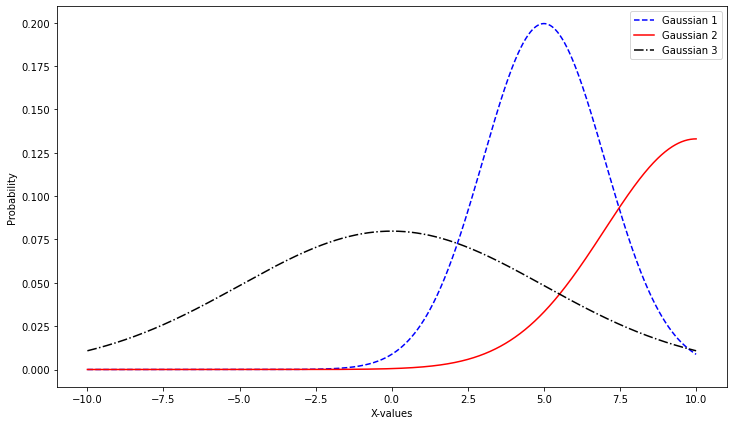

In [11]:
# part d
plt.figure(figsize = (12, 7))
plt.plot(x, gauss1, label = 'Gaussian 1', linestyle = '--', color = 'blue')
plt.plot(x, gauss2, label = 'Gaussian 2', linestyle = '-', color = 'red')
plt.plot(x, gauss3, label = 'Gaussian 3', linestyle = '-.', color = 'black')
plt.ylabel('Probability')
plt.xlabel('X-values')
plt.legend()
#plt.savefig('Three_Gaussians.png')
plt.show()

## Exercise 3: Matrix Multiplication

You have a last minute linear algebra homework and you are tired of doing matrix multiplication by hand so you decide to use your amazing python knowledge to speed things up. You get the idea that you can code up matrix multiplication to get the answer. Your goal is to wirte a function that takes any N x M and M x P array and performs the matrix multiplication that results in an N x P matrix. The equation for getting the elements of the matrix product C from matrix A and B is given below.

$$ c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \ldots + a_{in}b_{nj} = \sum_{k=1}^{n} a_{ik}b_{kj} $$

Where i corresponds to the rows, j corresponds to the columns.

In [12]:
def Matrix_Multiplication(Matrix1, Matrix2):
    
    #getting the row and columns of each matrix to make sure we can perform the
    #matricx mutliplication
    column1 = Matrix1.shape[1]
    row2 = Matrix2.shape[0]
    
    #checking the condition for matrix mutliplication
    if column1 == row2:
        
        #getting the row and column of the resulting output matrix
        row1 = Matrix1.shape[0]
        column2 = Matrix2.shape[1]
        
        #making an empty matrix
        mult_matrix = np.zeros((row1, column2))
        
        #looping over all the rows and columns of the output matrix
        for row in np.arange(0, mult_matrix.shape[0]):
            for column in np.arange(0, mult_matrix.shape[1]):
                #populating it by the product of the row and columns of the respective matrix
                mult_matrix[row, column] = np.sum(Matrix1[row] * Matrix2[:, column])
        
        return mult_matrix
        
    #condition if the matrix multiplication cannot be done
    else:
        print('Column from Matrix 1 does not match Rows of Matrix 2')
        print('Cannot perform matrix multiplication')

In [13]:
Matrix_Multiplication(np.random.random(size = (10, 10)), np.random.random(size = (10, 5)))

array([[3.45934215, 2.45928797, 1.87121104, 2.6691778 , 2.97769455],
       [3.31299668, 3.13707741, 1.82655974, 2.53700032, 3.25109513],
       [2.27861698, 1.96675121, 1.90835831, 1.95632311, 2.49502389],
       [3.00453358, 2.65734903, 2.38875486, 1.87102903, 3.02349888],
       [4.54397811, 3.49592819, 2.61552941, 2.74964057, 3.68820704],
       [2.01420807, 2.03895617, 1.62895241, 1.48094838, 2.36804808],
       [3.21090629, 2.91396165, 2.26586227, 2.11935978, 3.24582212],
       [3.12141072, 2.2706125 , 1.52435009, 1.9402988 , 2.46002411],
       [2.30147104, 1.99300218, 1.79703813, 1.51732847, 2.13159288],
       [3.27496534, 3.06119306, 2.02625144, 1.9484945 , 2.82847676]])

In [28]:
np.random.seed(42)
print(Matrix_Multiplication(np.random.random(size = (10, 10)), np.random.random(size = (10, 5))))
print()

np.random.seed(42)
print(np.dot(np.random.random(size = (10, 10)), np.random.random(size = (10, 5))))

[[2.08403852 2.54029982 3.08289796 2.10402406 2.57989727]
 [1.61689459 1.65504478 2.53506691 1.55439532 1.87126604]
 [1.98295733 2.32773917 2.16192695 1.39686368 2.32334129]
 [2.86582417 3.3151915  2.22689093 1.72627878 2.45016401]
 [2.2527958  2.38043416 2.03441831 1.51621784 2.06500218]
 [2.30805322 3.42667586 3.24887757 2.43207186 3.0018875 ]
 [1.51576296 2.54252873 2.83469835 1.69510248 2.64085898]
 [2.36330809 2.82961915 1.78343096 1.65451273 2.62651281]
 [2.1056849  2.45822001 2.65474448 1.7115915  3.00396204]
 [2.10936977 2.4474153  2.48880227 1.77322078 2.32165568]]

[[2.08403852 2.54029982 3.08289796 2.10402406 2.57989727]
 [1.61689459 1.65504478 2.53506691 1.55439532 1.87126604]
 [1.98295733 2.32773917 2.16192695 1.39686368 2.32334129]
 [2.86582417 3.3151915  2.22689093 1.72627878 2.45016401]
 [2.2527958  2.38043416 2.03441831 1.51621784 2.06500218]
 [2.30805322 3.42667586 3.24887757 2.43207186 3.0018875 ]
 [1.51576296 2.54252873 2.83469835 1.69510248 2.64085898]
 [2.36330809